In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('machine-learning-ex2\ex2\ex2data1.txt',header=None)

In [7]:
#plot the data
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [9]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]

Text(0, 0.5, 'Exam score 2')

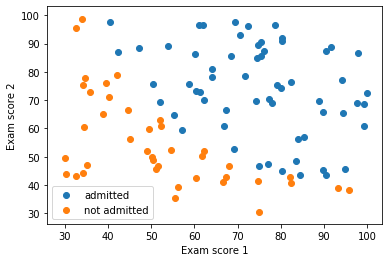

In [16]:
mask=y==1
adm=plt.scatter(X.loc[mask][0],X.loc[mask][1])
not_adm=plt.scatter(X.loc[~mask][0],X.loc[~mask][1])
plt.legend((adm,not_adm),('admitted','not admitted'))
plt.xlabel('Exam score 1')
plt.ylabel('Exam score 2')

In [20]:
m,n=X.shape
X=np.hstack((np.ones((m,1)),X))

In [22]:
y=y[:,np.newaxis]

In [25]:
theta=np.zeros([n+1,1])

In [27]:
print(theta.shape,X.shape,y.shape)

(3, 1) (100, 3) (100, 1)


In [29]:
#hypothesis 
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [33]:
def costfun(theta,X,y):
    m=len(y)
    temp1=np.multiply(y,np.log(sigmoid(np.dot(X,theta))))
    temp2= np.multiply(1-y,np.log(1-sigmoid(np.dot(X,theta))))
    return -(np.sum(temp1+temp2))/(m)

In [42]:
def gradient(theta,X,y,alpha,iters):
    for _ in range(iters):
        m=len(y)
        temp=sigmoid(np.dot(X,theta))-y
        theta=theta-((alpha)*(np.dot(X.T,temp)/(m)))
    return theta

In [69]:
theta=np.zeros([n+1,1])
theta=gradient(theta,X,y,0.001,1000000)

In [72]:
costfun(theta,X,y)
newtheta=theta

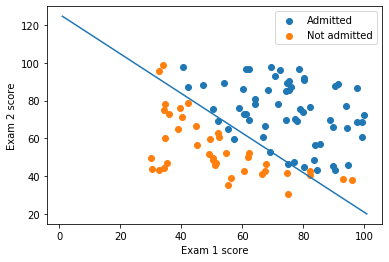

In [87]:
plot_x = [np.min(X[:,1]-2), np.max(X[:,2]+2)]
plot_x=np.hstack((np.ones((1)),plot_x))
plot_x=np.expand_dims(plot_x,axis=1)
plot_y = -1/newtheta[2]*(newtheta[0] + np.dot(newtheta[1],plot_x.T))  
mask = y.flatten() == 1
adm = plt.scatter(X[mask][:,1], X[mask][:,2])
not_adm = plt.scatter(X[~mask][:,1], X[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [89]:
#using scipy opt

def gradient(theta,X,y):
    return (np.dot(X.T,sigmoid(np.dot(X,theta))-y))* (1/m)

In [90]:
theta=np.zeros([n+1,1])

In [110]:
newtheta=opt.fmin_tnc(func=costfun,x0=theta.flatten(),fprime=gradient,args=(X,y.flatten()))
newtheta=newtheta[0].reshape(len(newtheta),1)

In [158]:
def accuracy(X, y, newtheta, cutoff):
    pred = [sigmoid(np.dot(X, newtheta)) >= cutoff]
    acc = np.mean(pred == y)
    print(acc * 100)


In [159]:
accuracy(X, y.flatten(), newtheta.flatten(), 0.5)
newtheta

89.0


array([[-25.16131863],
       [  0.20623159],
       [  0.20147149]])

In [163]:
#logistic with regularization
data =pd.read_csv('machine-learning-ex2\ex2\ex2data2.txt',header=None)

In [320]:
X=data.iloc[:,0:2]
y=data.iloc[:,-1]

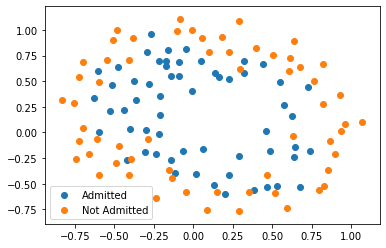

In [229]:
mask=y==1
adm=plt.scatter(X[mask][0],X[mask][1])
not_adm=plt.scatter(X[~mask][0],X[~mask][1])
plt.legend((adm,not_adm),('Admitted','Not Admitted'))

In [230]:
#feature mapping 
def feature(X1,X2):
    degree=6
    out=np.ones(X.shape[0])[:,np.newaxis]
    for i in range(1,degree+1):
        for j in range(i+1):
            out=np.hstack((out,np.multiply(np.power(X1,i-j),np.power(X2,j))[:,np.newaxis]))
    return out

In [321]:
X=feature(X.iloc[:,0],X.iloc[:,1])

In [256]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [338]:
def costfunction(theta,X,y,lmbda):
    m=len(y)
    J= (-1/m)* np.sum((np.multiply(y,np.log(sigmoid(np.dot(X,theta))))+np.multiply(1-y,np.log(1-sigmoid(np.dot(X,theta))))))
    reg=(lmbda/(2*m))*np.dot(theta[1:].T,theta[1:])
    J=J+reg
    return np.ravel(J)

In [322]:
m,n=X.shape
y=y[:,np.newaxis]
theta=np.zeros([n,1])
lmbda=1


In [298]:
print(theta.shape,X.shape,y.shape)

(28, 1) (118, 28) (118, 1)


In [337]:
np.ravel(costfunction(theta,X,y,lmbda))


array([0.69314718])

In [345]:
def gradient(theta,X,y,lmbda):
    temp=sigmoid(np.dot(X,theta))-y
    temp=(1/m)*(np.dot(X.T,temp))
    temp[1:]=temp[1:]+(lmbda/(m))*(theta[1:])
    return temp

In [346]:
lmbda=1
output=opt.fmin_tnc(func=costfunction,x0=theta.flatten(),fprime=gradient,args=(X,y.flatten(),lmbda))
newtheta=output[0]
print(newtheta)
newtheta=newtheta[:,np.newaxis]

[ 1.27271027  0.62529965  1.18111686 -2.019874   -0.91743189 -1.43166929
  0.12393227 -0.36553118 -0.35725406 -0.17516292 -1.4581701  -0.05098418
 -0.61558559 -0.27469166 -1.19271299 -0.24217841 -0.20603303 -0.04466178
 -0.27778947 -0.29539514 -0.45645983 -1.04319153  0.02779373 -0.29244864
  0.01555759 -0.32742404 -0.14389149 -0.92467488]


In [347]:
costfunction(newtheta,X,y,lmbda)

array([0.52900273])

(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,

(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,)
(28,

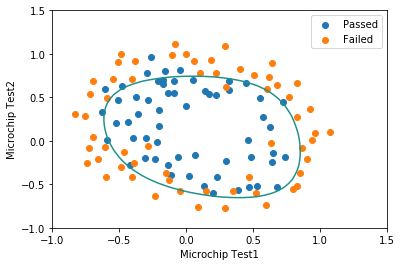

In [365]:
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))
def mapFeatureForPlotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, i-j), np.power(X2, j))))
    print(out.shape)        
    return out
for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(mapFeatureForPlotting(u[i], v[j]), newtheta)
mask = y.flatten() == 1
X = data.iloc[:,:-1]
passed = plt.scatter(X[mask][0], X[mask][1])
failed = plt.scatter(X[~mask][0], X[~mask][1])
plt.contour(u,v,z,0)
plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend((passed, failed), ('Passed', 'Failed'))
plt.show()